<a href="https://colab.research.google.com/github/talrab1999/Worker-Absenteeism-Classification/blob/main/AbsentFromWorkPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
df = pd.read_csv("time_off_data_train.csv")
df.head()

ID  Reason  Month  Day  Transportation expense  Residence Distance  \
0  28      23     10    2                      30                 NaN   
1  17      18      1    3                      20                 7.0   
2  25       1      7    3                      34                31.0   
3  11      28     11    2                      21                 NaN   
4  10      23      3    2                      32                15.0   

   Service time    Education  Son Smoker  Pet  Weight  Height  Season Drinker  \
0          12.0  High school  NaN    NaN  0.0   106.0   167.0     4.0     Yes   
1          13.0  High school  2.0    NaN  0.0    95.0   196.0     2.0     Yes   
2          10.0  High school  4.0     No  0.0    65.0   168.0     1.0     Yes   
3          17.0  High school  0.0     No  0.0    89.0   170.0     4.0     Yes   
4          13.0  High school  2.0    NaN  1.0    86.0   165.0     2.0      No   

     Age Group TimeOff  
0  Middle Aged     Low  
1          NaN    High  
2        Adult    High  
3        Adult     Low  
4  Middle Aged     Low

In [ ]:
timeoff_map = {"Low": 0, "Medium": 1, "High": 2, "Very High": 3}
df["TimeOff"] = df["TimeOff"].map(timeoff_map)

In [ ]:
df["TimeOff"].unique()

array([0, 2, 1, 3])

In [ ]:
df['Education'].unique()

array(['High school', nan, 'Postgraduate', 'Graduate', 'Phd'],
      dtype=object)

In [ ]:
education_mapping = {
    "High school": 0,
    "Graduate": 1,
    "Postgraduate": 2,
    "PhD": 3
}
df["Education"] = df["Education"].map(education_mapping)

In [ ]:
df.head()

ID  Reason  Month  Day  Transportation expense  Residence Distance  \
0  28      23     10    2                      30                 NaN   
1  17      18      1    3                      20                 7.0   
2  25       1      7    3                      34                31.0   
3  11      28     11    2                      21                 NaN   
4  10      23      3    2                      32                15.0   

   Service time  Education  Son Smoker  Pet  Weight  Height  Season Drinker  \
0          12.0        0.0  NaN    NaN  0.0   106.0   167.0     4.0     Yes   
1          13.0        0.0  2.0    NaN  0.0    95.0   196.0     2.0     Yes   
2          10.0        0.0  4.0     No  0.0    65.0   168.0     1.0     Yes   
3          17.0        0.0  0.0     No  0.0    89.0   170.0     4.0     Yes   
4          13.0        0.0  2.0    NaN  1.0    86.0   165.0     2.0      No   

     Age Group  TimeOff  
0  Middle Aged        0  
1          NaN        2  
2        Adult        2  
3        Adult        0  
4  Middle Aged        0

In [ ]:
df['Age Group'].unique()

array(['Middle Aged', nan, 'Adult', 'Young Adult', 'Senior'], dtype=object)

In [ ]:
Age_mapping = {
    "Young Adult": 0,
    "Adult": 1,
    "Middle Aged": 2,
    "Senior": 3
}
df["Age Group"] = df["Age Group"].map(Age_mapping)

In [ ]:
df.head()

ID  Reason  Month  Day  Transportation expense  Residence Distance  \
0  28      23     10    2                      30                 NaN   
1  17      18      1    3                      20                 7.0   
2  25       1      7    3                      34                31.0   
3  11      28     11    2                      21                 NaN   
4  10      23      3    2                      32                15.0   

   Service time  Education  Son Smoker  Pet  Weight  Height  Season Drinker  \
0          12.0        0.0  NaN    NaN  0.0   106.0   167.0     4.0     Yes   
1          13.0        0.0  2.0    NaN  0.0    95.0   196.0     2.0     Yes   
2          10.0        0.0  4.0     No  0.0    65.0   168.0     1.0     Yes   
3          17.0        0.0  0.0     No  0.0    89.0   170.0     4.0     Yes   
4          13.0        0.0  2.0    NaN  1.0    86.0   165.0     2.0      No   

   Age Group  TimeOff  
0        2.0        0  
1        NaN        2  
2        1.0        2  
3        1.0        0  
4        2.0        0

In [ ]:
smoke_mapping = {
    "No": 0,
    "Yes": 1
}
df["Smoker"] = df["Smoker"].map(smoke_mapping)

In [ ]:
drink_mapping = {
    "No": 0,
    "Yes": 1
}
df["Drinker"] = df["Drinker"].map(drink_mapping)

In [ ]:
df.head()

ID  Reason  Month  Day  Transportation expense  Residence Distance  \
0  28      23     10    2                      30                 NaN   
1  17      18      1    3                      20                 7.0   
2  25       1      7    3                      34                31.0   
3  11      28     11    2                      21                 NaN   
4  10      23      3    2                      32                15.0   

   Service time  Education  Son  Smoker  Pet  Weight  Height  Season  Drinker  \
0          12.0        0.0  NaN     NaN  0.0   106.0   167.0     4.0      1.0   
1          13.0        0.0  2.0     NaN  0.0    95.0   196.0     2.0      1.0   
2          10.0        0.0  4.0     0.0  0.0    65.0   168.0     1.0      1.0   
3          17.0        0.0  0.0     0.0  0.0    89.0   170.0     4.0      1.0   
4          13.0        0.0  2.0     NaN  1.0    86.0   165.0     2.0      0.0   

   Age Group  TimeOff  
0        2.0        0  
1        NaN        2  
2        1.0        2  
3        1.0        0  
4        2.0        0

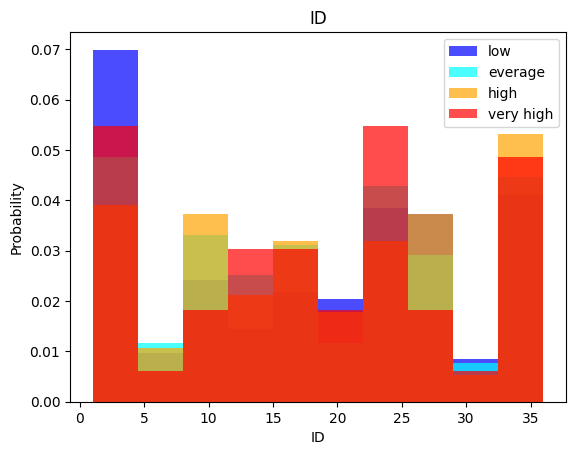

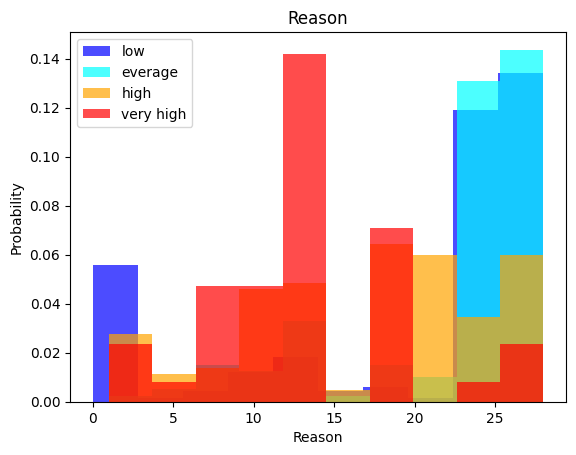

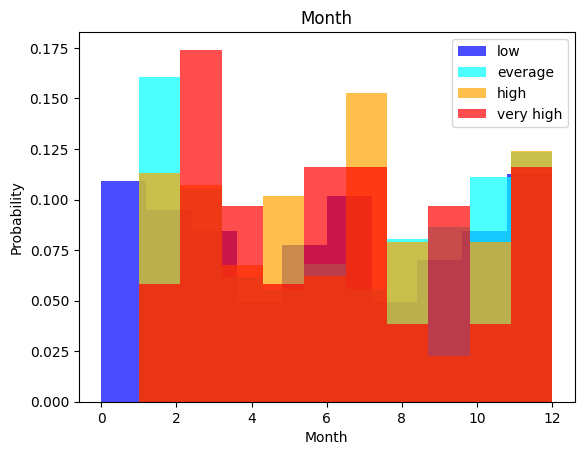

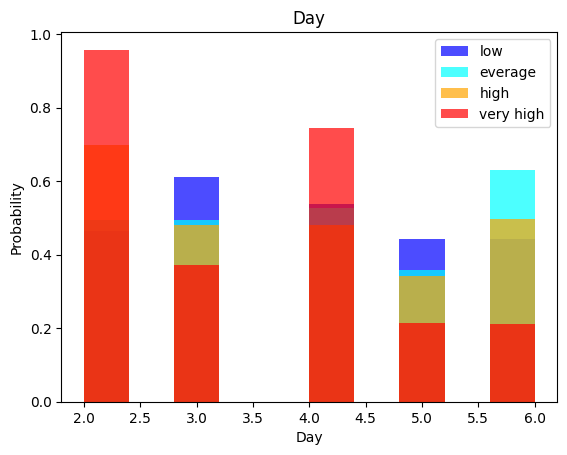

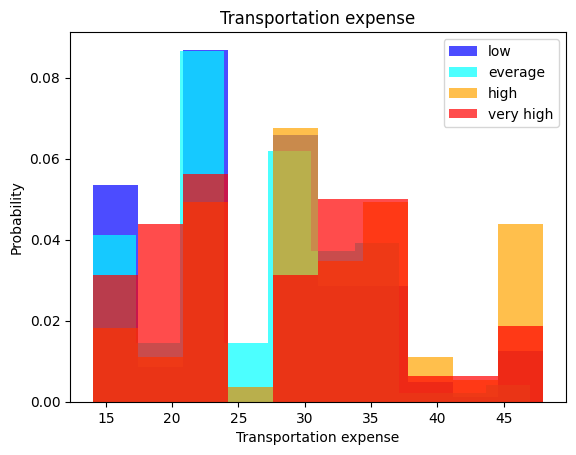

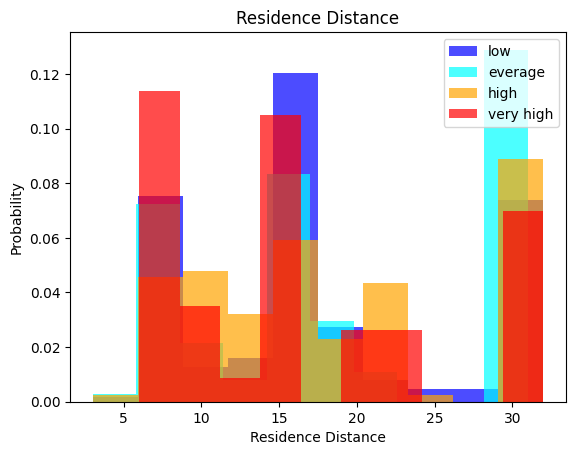

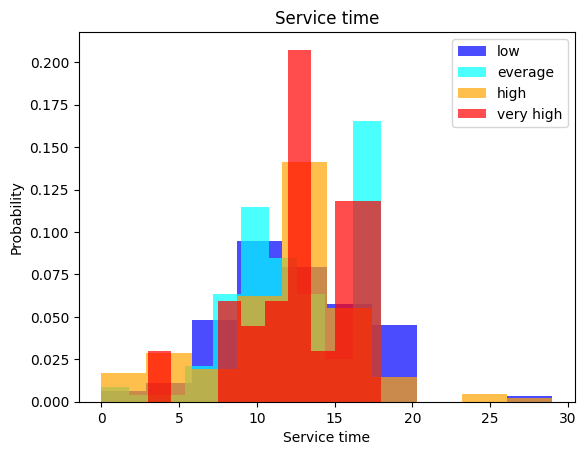

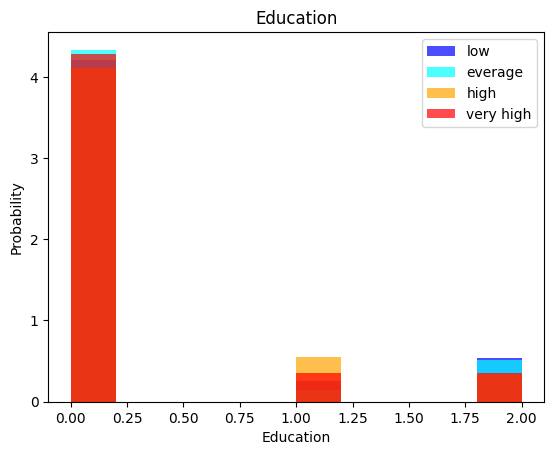

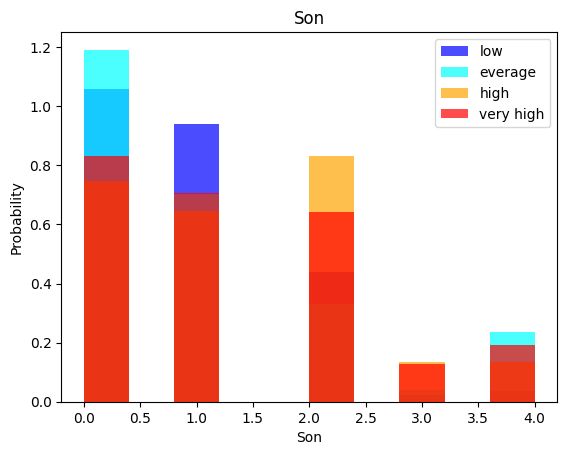

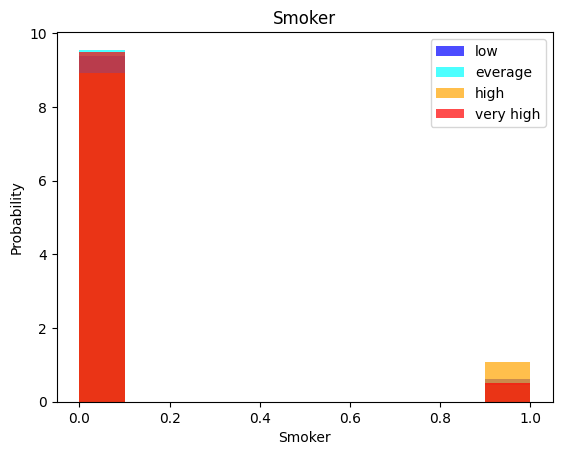

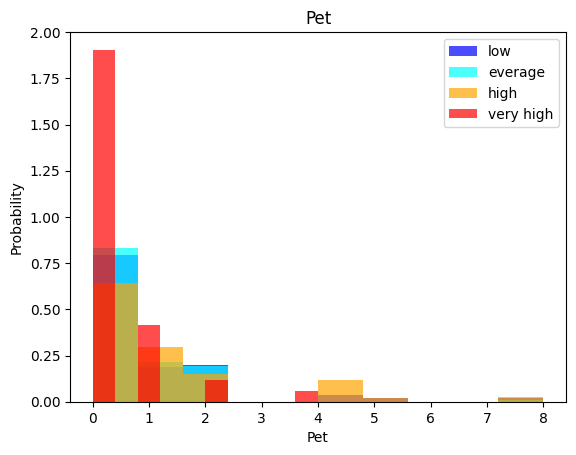

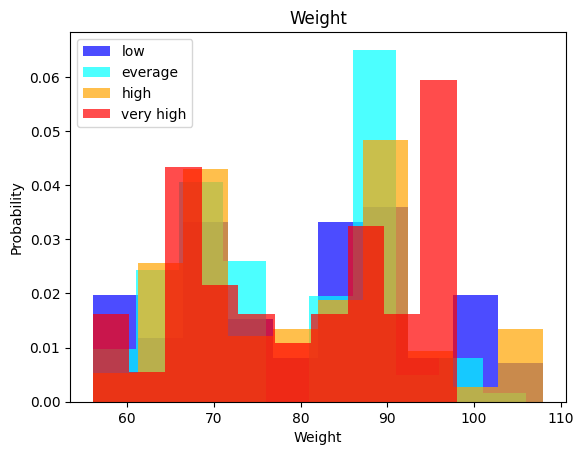

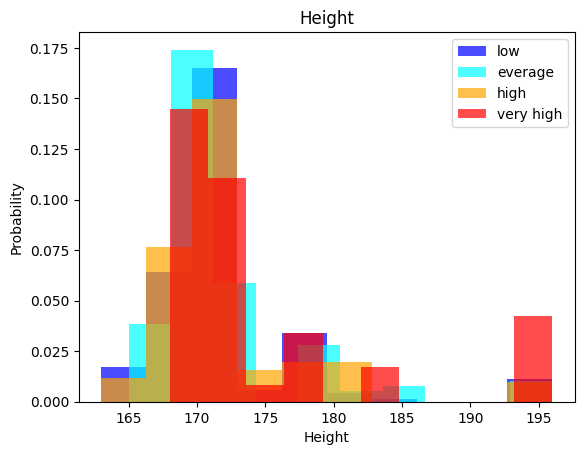

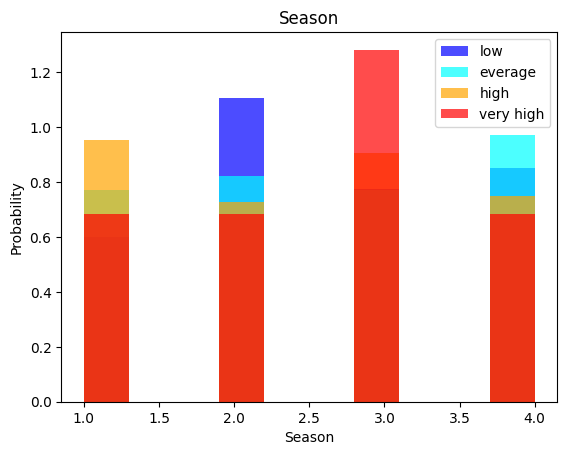

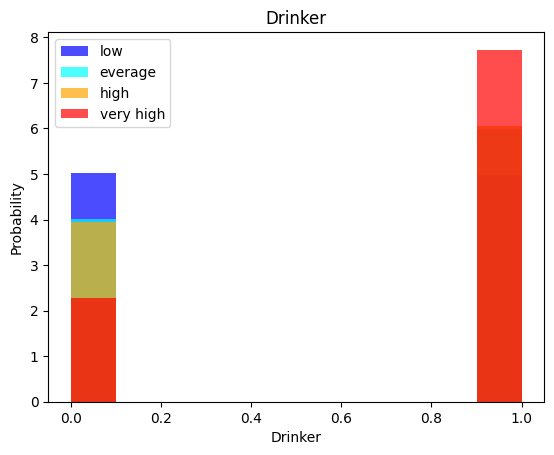

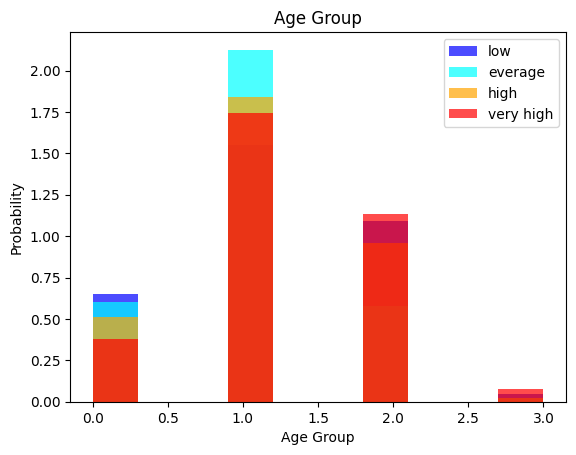

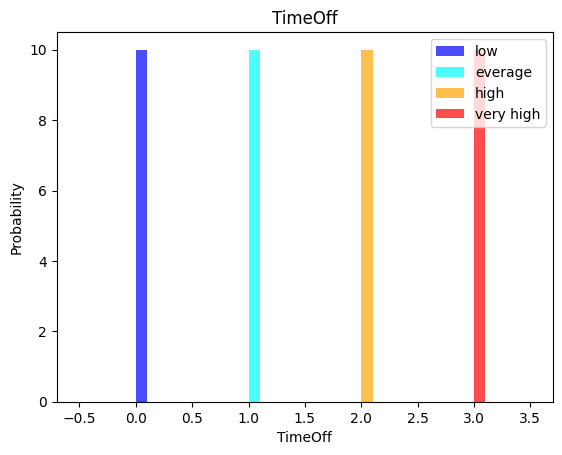

In [ ]:
for label in df.columns:
  plt.hist(df[df["TimeOff"] == 0][label], color = "blue", label = 'low', alpha = 0.7, density= True)
  plt.hist(df[df["TimeOff"] == 1][label], color = "cyan", label = 'everage', alpha = 0.7, density= True)
  plt.hist(df[df["TimeOff"] == 2][label], color = "orange", label = 'high', alpha = 0.7, density= True)
  plt.hist(df[df["TimeOff"] == 3][label], color = "red", label = 'very high', alpha = 0.7, density= True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

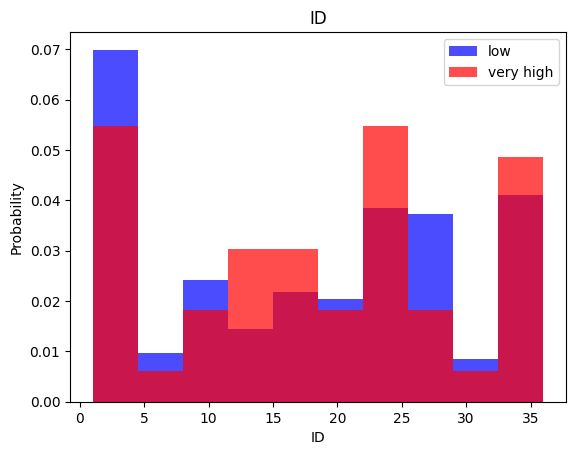

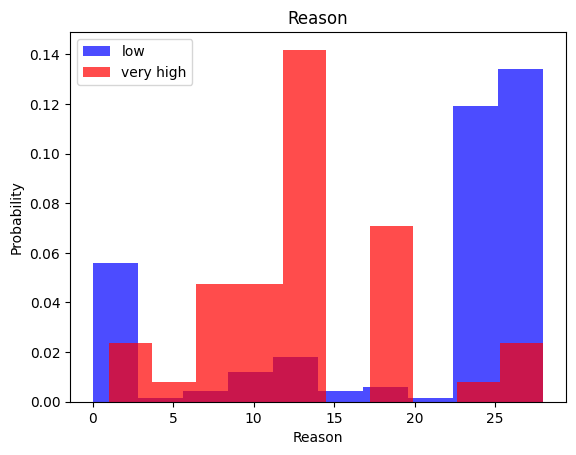

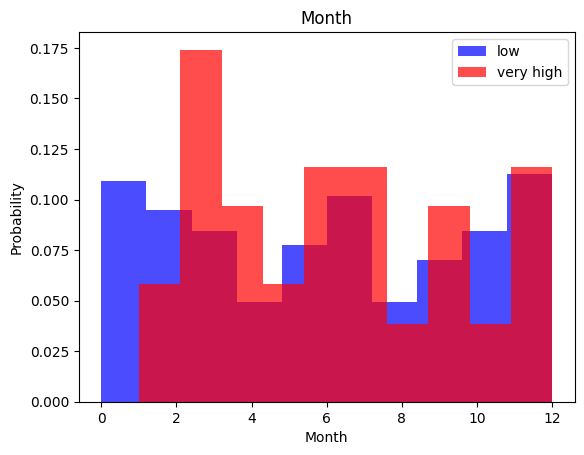

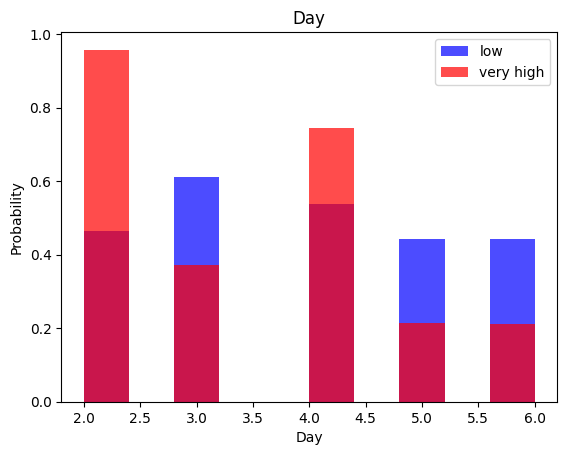

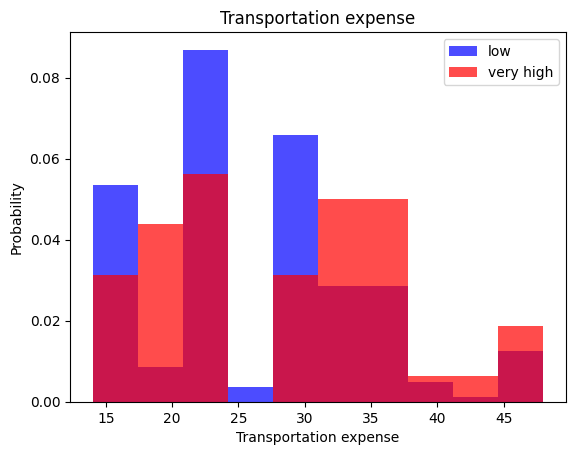

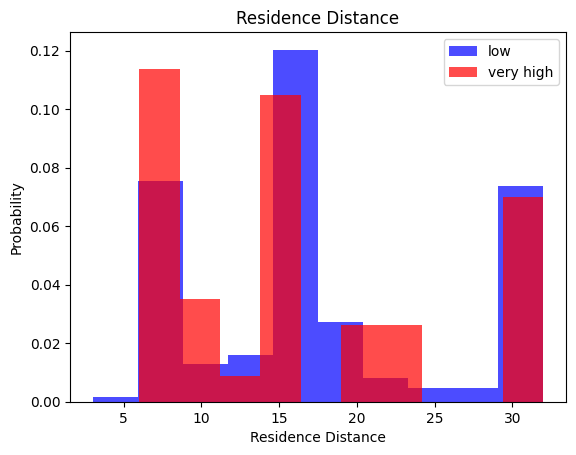

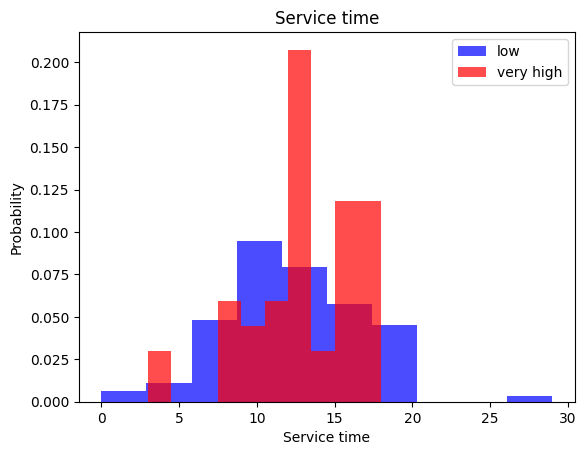

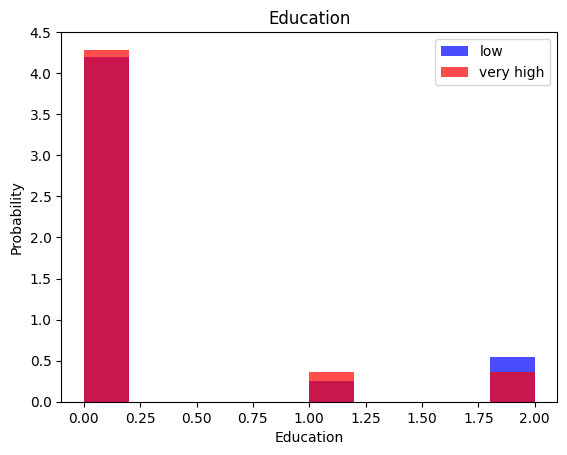

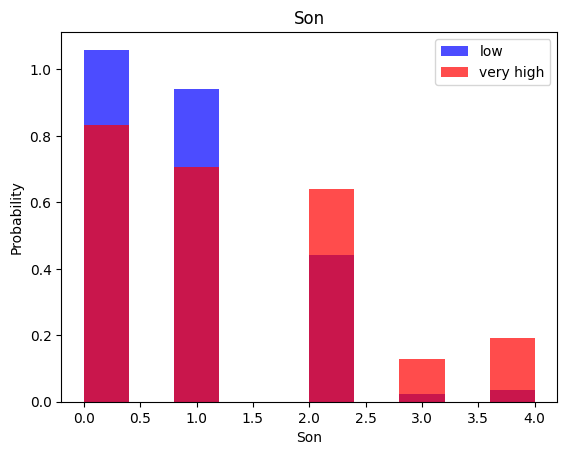

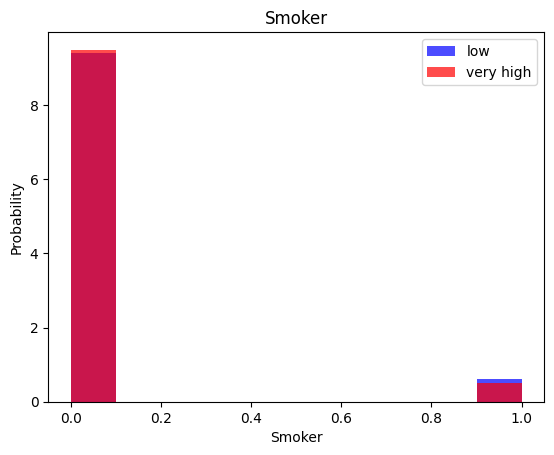

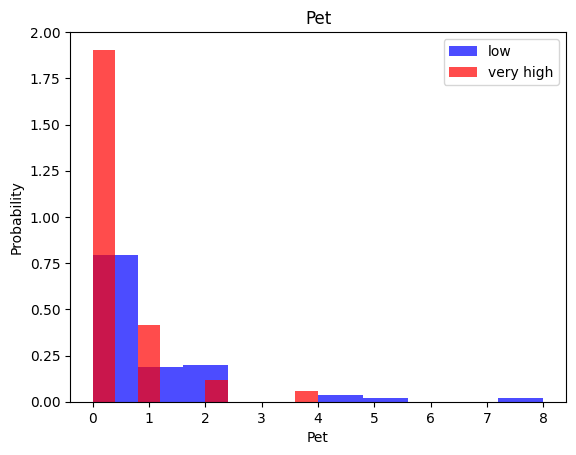

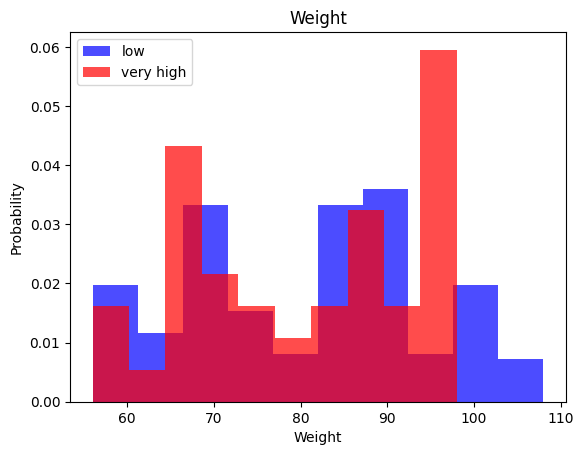

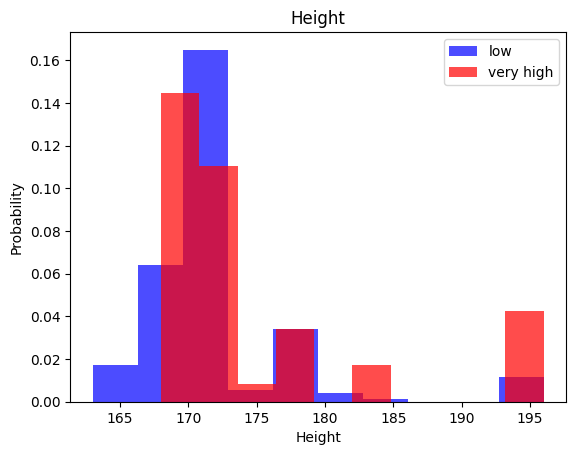

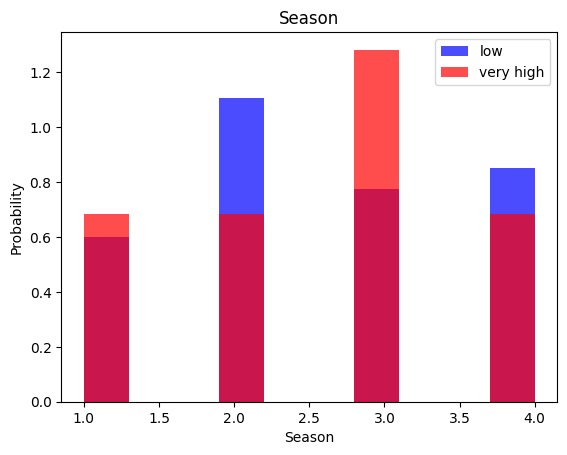

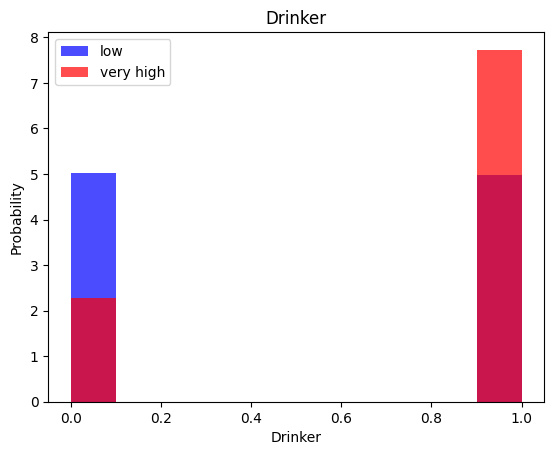

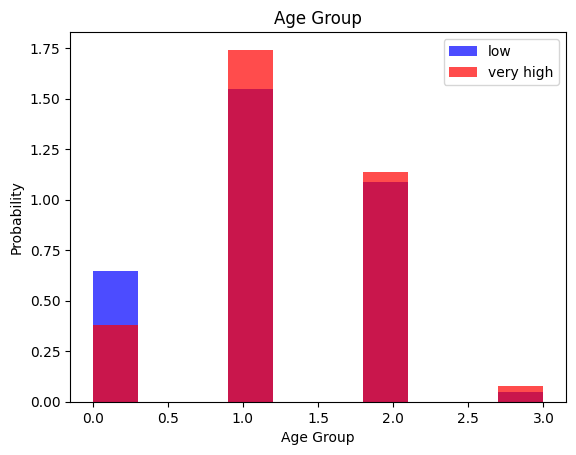

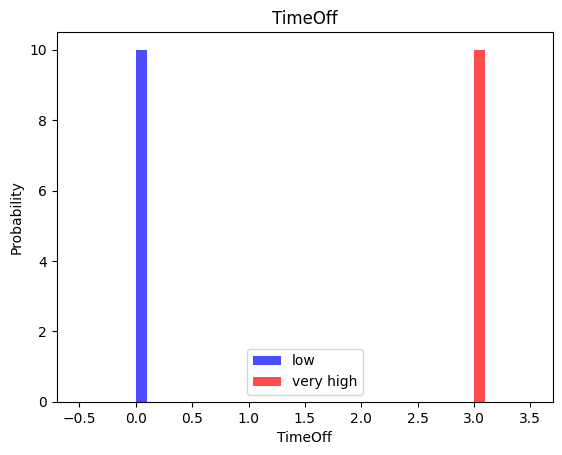

In [ ]:
for label in df.columns:
  plt.hist(df[df["TimeOff"] == 0][label], color = "blue", label = 'low', alpha = 0.7, density= True)
  #plt.hist(df[df["TimeOff"] == 1][label], color = "green", label = 'everage', alpha = 0.6, density= True)
  #plt.hist(df[df["TimeOff"] == 2][label], color = "purple", label = 'high', alpha = 0.6, density= True)
  plt.hist(df[df["TimeOff"] == 3][label], color = "red", label = 'very high', alpha = 0.7, density= True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
df.drop(columns=["Smoker"], inplace=True)

In [ ]:
df.head()

ID  Reason  Month  Day  Transportation expense  Residence Distance  \
0  28      23     10    2                      30                 NaN   
1  17      18      1    3                      20                 7.0   
2  25       1      7    3                      34                31.0   
3  11      28     11    2                      21                 NaN   
4  10      23      3    2                      32                15.0   

   Service time  Education  Son  Pet  Weight  Height  Season  Drinker  \
0          12.0        0.0  NaN  0.0   106.0   167.0     4.0      1.0   
1          13.0        0.0  2.0  0.0    95.0   196.0     2.0      1.0   
2          10.0        0.0  4.0  0.0    65.0   168.0     1.0      1.0   
3          17.0        0.0  0.0  0.0    89.0   170.0     4.0      1.0   
4          13.0        0.0  2.0  1.0    86.0   165.0     2.0      0.0   

   Age Group  TimeOff  
0        2.0        0  
1        NaN        2  
2        1.0        2  
3        1.0        0  
4        2.0        0

In [ ]:
df.drop(columns=["Education"], inplace=True)

In [ ]:
df.head()

ID  Reason  Month  Day  Transportation expense  Residence Distance  \
0  28      23     10    2                      30                 NaN   
1  17      18      1    3                      20                 7.0   
2  25       1      7    3                      34                31.0   
3  11      28     11    2                      21                 NaN   
4  10      23      3    2                      32                15.0   

   Service time  Son  Pet  Weight  Height  Season  Drinker  Age Group  TimeOff  
0          12.0  NaN  0.0   106.0   167.0     4.0      1.0        2.0        0  
1          13.0  2.0  0.0    95.0   196.0     2.0      1.0        NaN        2  
2          10.0  4.0  0.0    65.0   168.0     1.0      1.0        1.0        2  
3          17.0  0.0  0.0    89.0   170.0     4.0      1.0        1.0        0  
4          13.0  2.0  1.0    86.0   165.0     2.0      0.0        2.0        0

In [ ]:
print(df.isnull().sum())

ID                         0
Reason                     0
Month                      0
Day                        0
Transportation expense     0
Residence Distance        49
Service time              50
Son                       68
Pet                       67
Weight                    68
Height                    57
Season                    61
Drinker                   64
Age Group                 56
TimeOff                    0
dtype: int64


In [ ]:
print(df.select_dtypes(include=["int64", "float64"]).skew())

ID                       -0.010544
Reason                   -0.913051
Month                     0.083870
Day                       0.159669
Transportation expense    0.370088
Residence Distance        0.336592
Service time             -0.063875
Son                       1.033967
Pet                       2.805664
Weight                    0.012442
Height                    2.451534
Season                   -0.024504
Drinker                  -0.307444
Age Group                 0.027834
TimeOff                   0.424604
dtype: float64


In [ ]:
df["Residence Distance"].fillna(df["Residence Distance"].mean(), inplace=True)
df["Service time"].fillna(df["Service time"].mean(), inplace=True)
df["Weight"].fillna(df["Weight"].mean(), inplace=True)
df["Season"].fillna(df["Season"].mean(), inplace=True)
df["Drinker"].fillna(df["Drinker"].mean(), inplace=True)
df["Age Group"].fillna(df["Age Group"].mean(), inplace=True)

<ipython-input-34-862d0c000245>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Residence Distance"].fillna(df["Residence Distance"].mean(), inplace=True)


In [ ]:
print(df.isnull().sum())

ID                         0
Reason                     0
Month                      0
Day                        0
Transportation expense     0
Residence Distance         0
Service time               0
Son                       68
Pet                       67
Weight                     0
Height                    57
Season                     0
Drinker                    0
Age Group                  0
TimeOff                    0
dtype: int64


In [ ]:
df["Son"].fillna(df["Son"].median(), inplace=True)
df["Pet"].fillna(df["Pet"].median(), inplace=True)
df["Height"].fillna(df["Height"].median(), inplace=True)

<ipython-input-36-faef50cf89ab>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Son"].fillna(df["Son"].median(), inplace=True)
<ipython-input-36-faef50cf89ab>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:
print(df.isnull().sum())

ID                        0
Reason                    0
Month                     0
Day                       0
Transportation expense    0
Residence Distance        0
Service time              0
Son                       0
Pet                       0
Weight                    0
Height                    0
Season                    0
Drinker                   0
Age Group                 0
TimeOff                   0
dtype: int64


In [ ]:
df.head()

ID  Reason  Month  Day  Transportation expense  Residence Distance  \
0  28      23     10    2                      30           17.959484   
1  17      18      1    3                      20            7.000000   
2  25       1      7    3                      34           31.000000   
3  11      28     11    2                      21           17.959484   
4  10      23      3    2                      32           15.000000   

   Service time  Son  Pet  Weight  Height  Season  Drinker  Age Group  TimeOff  
0          12.0  1.0  0.0   106.0   167.0     4.0      1.0   2.000000        0  
1          13.0  2.0  0.0    95.0   196.0     2.0      1.0   1.126866        2  
2          10.0  4.0  0.0    65.0   168.0     1.0      1.0   1.000000        2  
3          17.0  0.0  0.0    89.0   170.0     4.0      1.0   1.000000        0  
4          13.0  2.0  1.0    86.0   165.0     2.0      0.0   2.000000        0

In [ ]:
train, valid, test = np.split(df.sample(frac = 1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def scale_dataset(dataframe, oversample = False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X,y)

  data = np.hstack((X, np.reshape(y, (-1,1))))

  return data, X, y

In [ ]:
print(len(train[train["TimeOff"] == 0]))
print(len(train[train["TimeOff"] == 1]))
print(len(train[train["TimeOff"] == 2]))
print(len(train[train["TimeOff"] == 3]))

148
82
97
28


In [ ]:
train, X_train, y_train = scale_dataset(train, oversample= True)
valid, X_valid, y_valid = scale_dataset(valid, oversample= False)
test, X_test, y_test = scale_dataset(test, oversample= False)

In [ ]:
print(sum(y_train == 0))
print(sum(y_train == 1))
print(sum(y_train == 2))
print(sum(y_train == 3))

148
148
148
148


#KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 9)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.42      0.49        43
           1       0.43      0.48      0.46        33
           2       0.46      0.36      0.41        33
           3       0.16      0.40      0.23        10

    accuracy                           0.42       119
   macro avg       0.41      0.42      0.39       119
weighted avg       0.47      0.42      0.43       119



#Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [ ]:
y_pred = nb_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.30      0.36        43
           1       0.52      0.82      0.64        33
           2       0.47      0.27      0.35        33
           3       0.17      0.30      0.21        10

    accuracy                           0.44       119
   macro avg       0.40      0.42      0.39       119
weighted avg       0.45      0.44      0.42       119



#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [ ]:
y_pred = lg_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.32      0.16      0.22        43
           1       0.48      0.64      0.55        33
           2       0.44      0.33      0.38        33
           3       0.21      0.60      0.32        10

    accuracy                           0.38       119
   macro avg       0.36      0.43      0.36       119
weighted avg       0.39      0.38      0.36       119



#SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.47      0.53        43
           1       0.57      0.64      0.60        33
           2       0.41      0.42      0.42        33
           3       0.20      0.30      0.24        10

    accuracy                           0.49       119
   macro avg       0.45      0.46      0.45       119
weighted avg       0.51      0.49      0.49       119



#NN using TensorFlow

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Sparse Categorical Crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [ ]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation= 'relu', input_shape = (X_train.shape[1],)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation= 'relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(4, activation = 'softmax')
  ])

  nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])
  history = nn_model.fit(
      X_train, y_train, epochs = epochs, batch_size= batch_size, validation_split = 0.2, verbose = 0
      )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


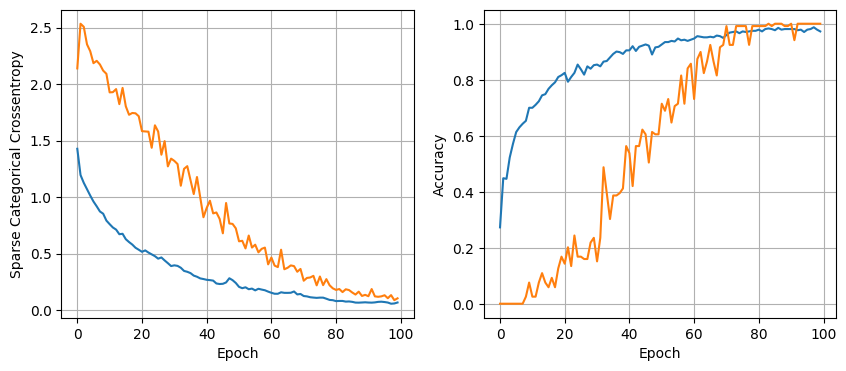

16 nodes, dropout 0, lr 0.01, batch size 64


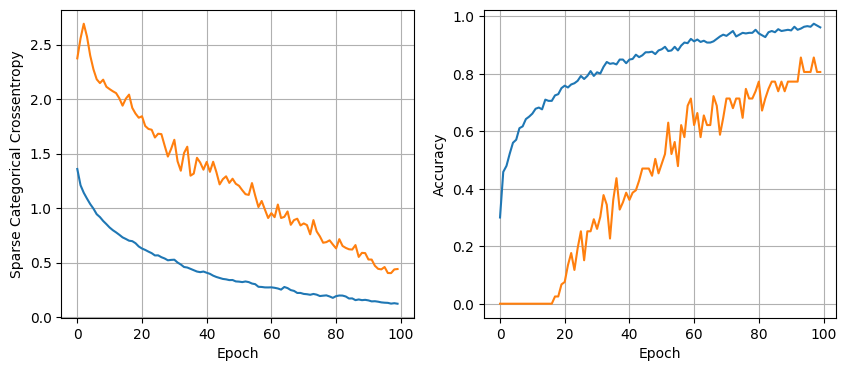

16 nodes, dropout 0, lr 0.01, batch size 128


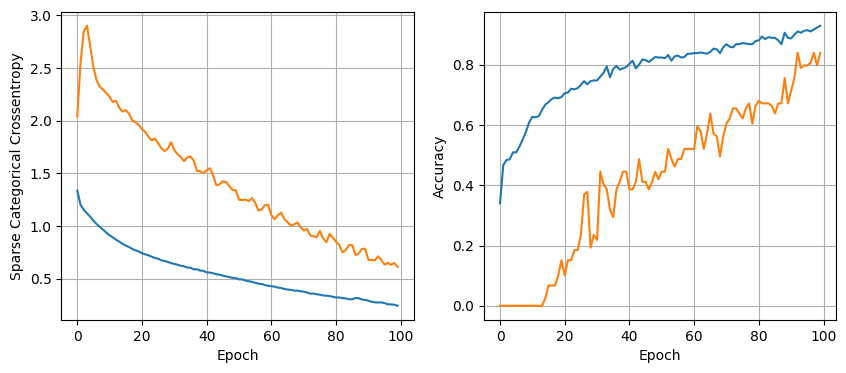

16 nodes, dropout 0, lr 0.005, batch size 32


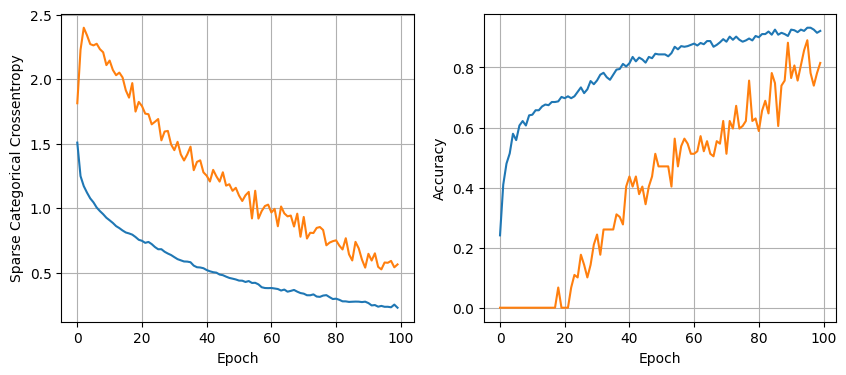

16 nodes, dropout 0, lr 0.005, batch size 64


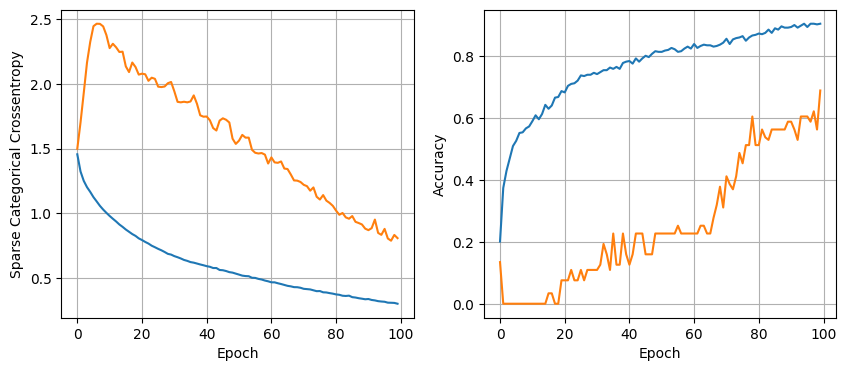

16 nodes, dropout 0, lr 0.005, batch size 128


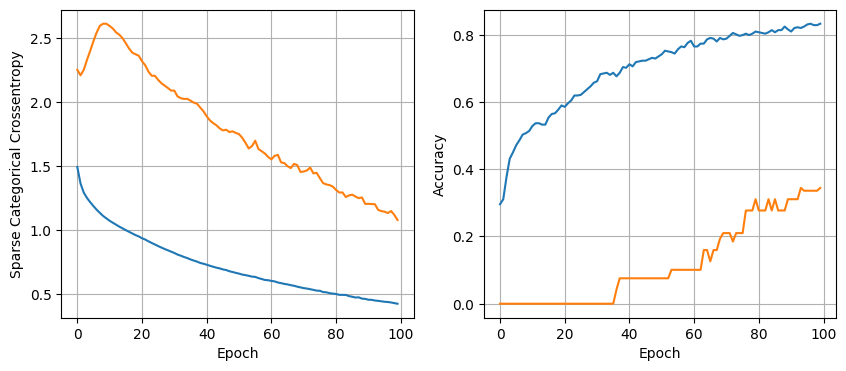

16 nodes, dropout 0, lr 0.001, batch size 32


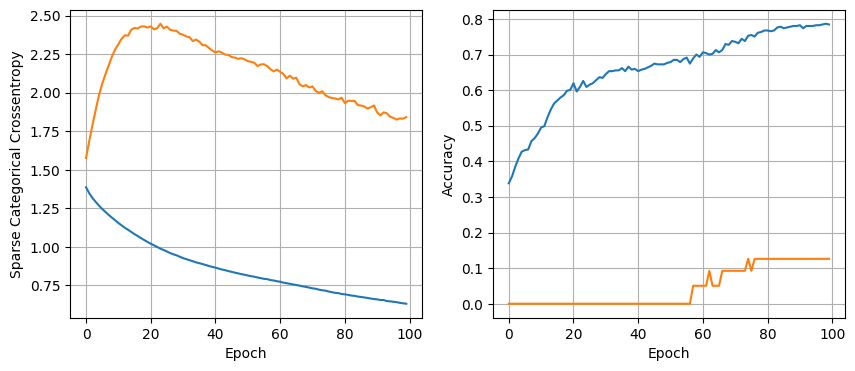

16 nodes, dropout 0, lr 0.001, batch size 64


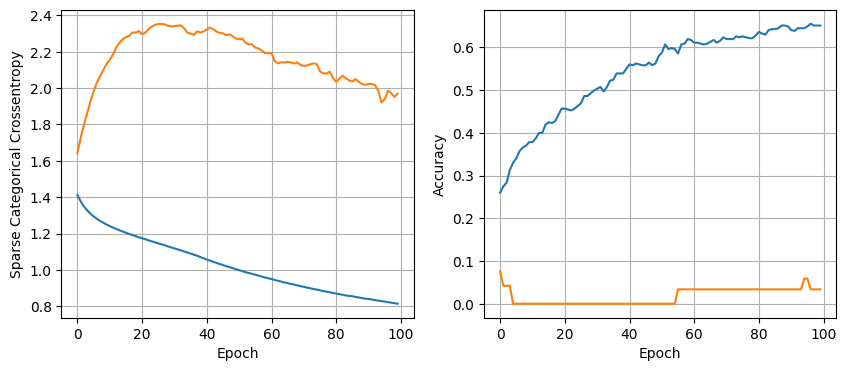

16 nodes, dropout 0, lr 0.001, batch size 128


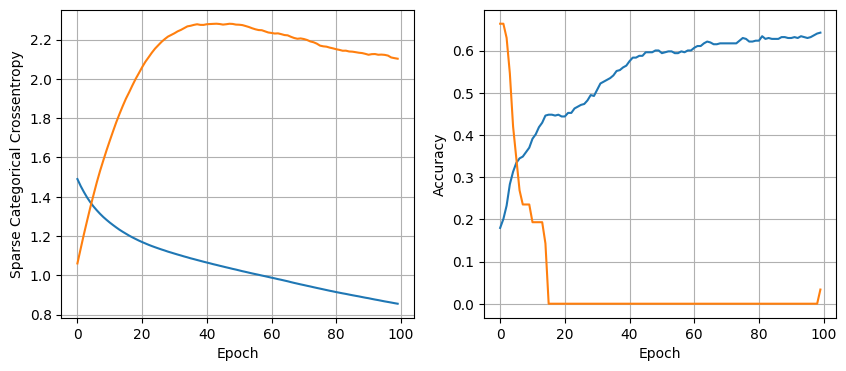

16 nodes, dropout 0.2, lr 0.01, batch size 32


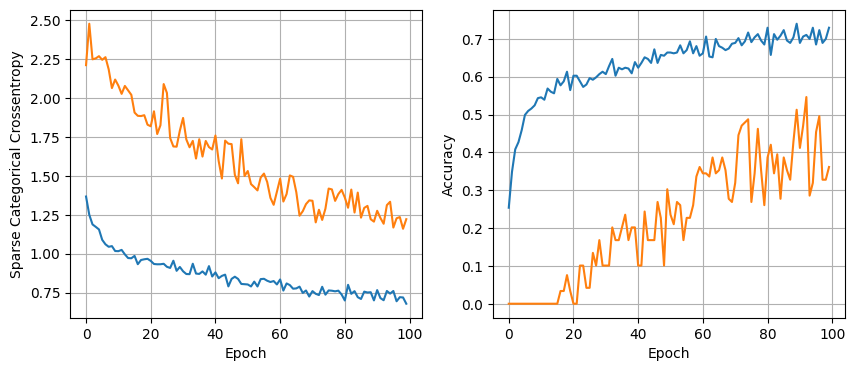

16 nodes, dropout 0.2, lr 0.01, batch size 64


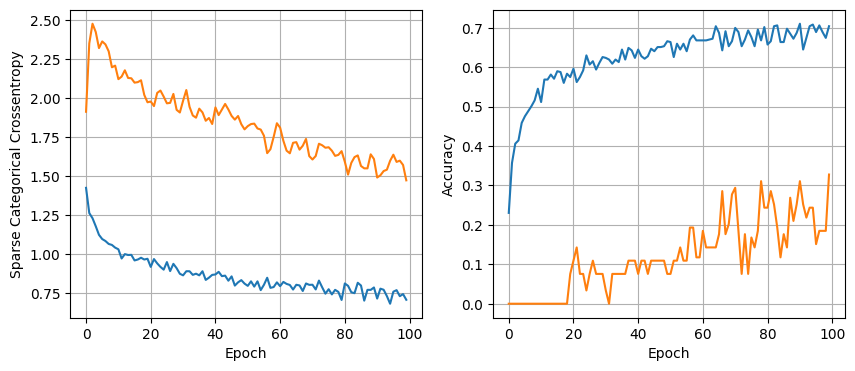

16 nodes, dropout 0.2, lr 0.01, batch size 128


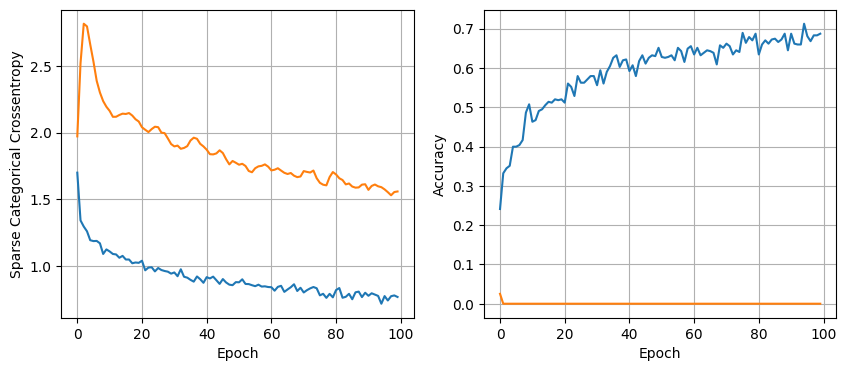

16 nodes, dropout 0.2, lr 0.005, batch size 32


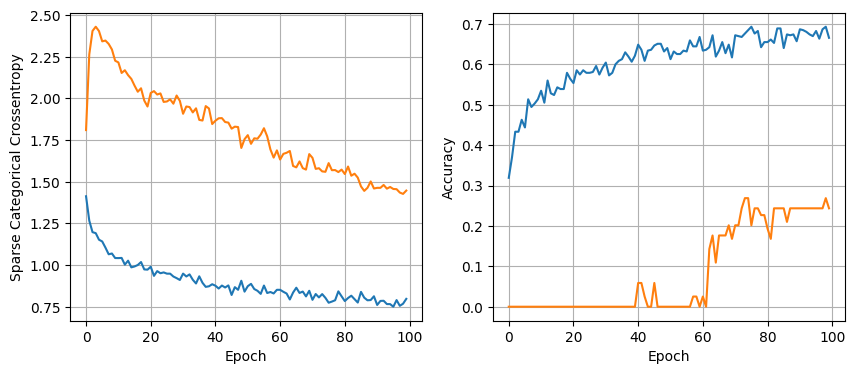

16 nodes, dropout 0.2, lr 0.005, batch size 64


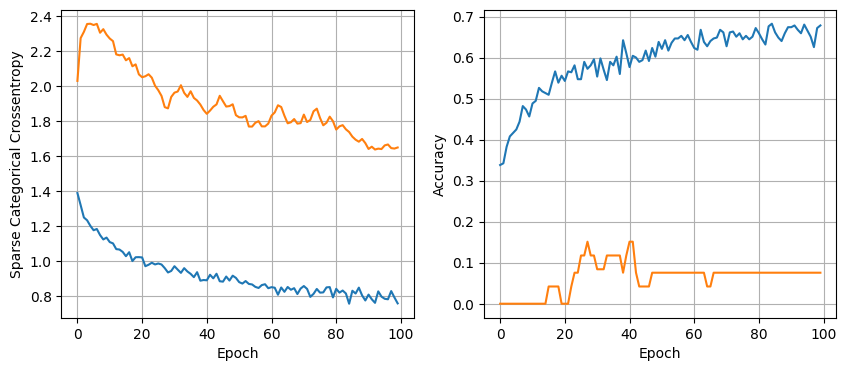

16 nodes, dropout 0.2, lr 0.005, batch size 128


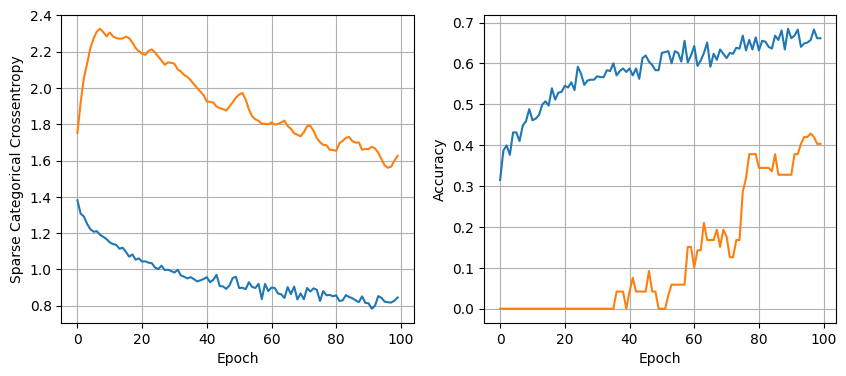

16 nodes, dropout 0.2, lr 0.001, batch size 32


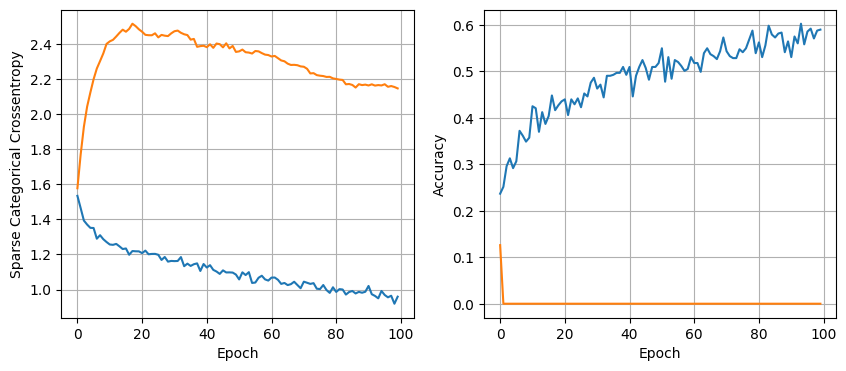

16 nodes, dropout 0.2, lr 0.001, batch size 64


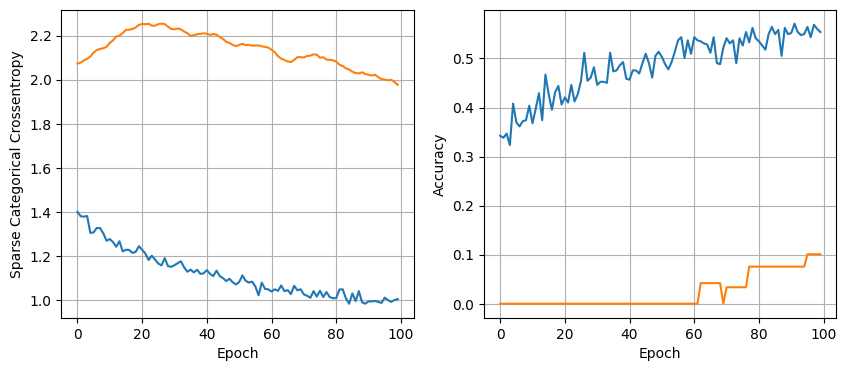

16 nodes, dropout 0.2, lr 0.001, batch size 128


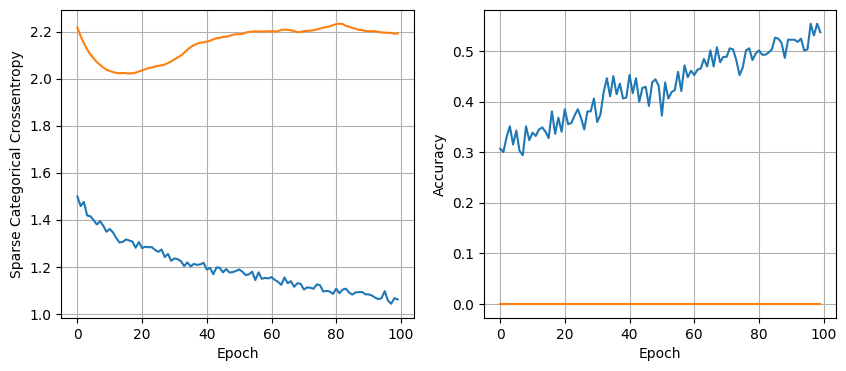

32 nodes, dropout 0, lr 0.01, batch size 32


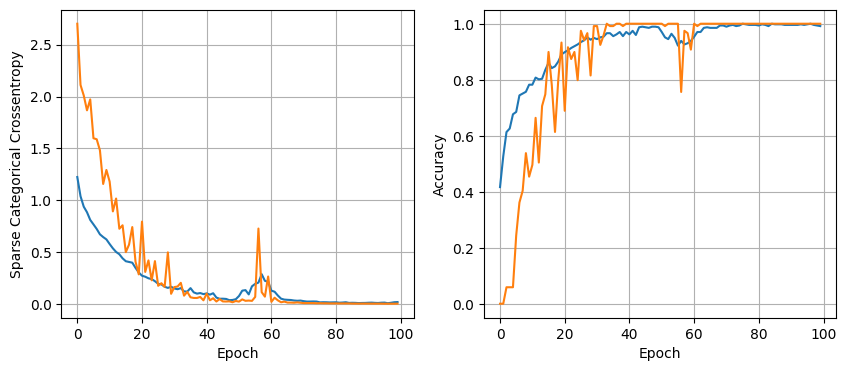

32 nodes, dropout 0, lr 0.01, batch size 64


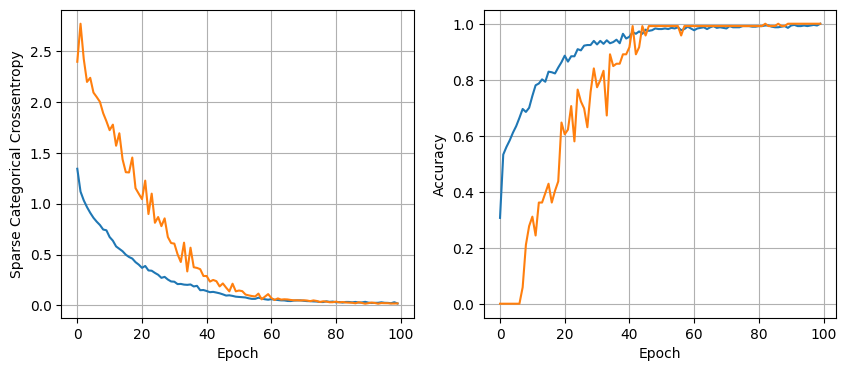

32 nodes, dropout 0, lr 0.01, batch size 128


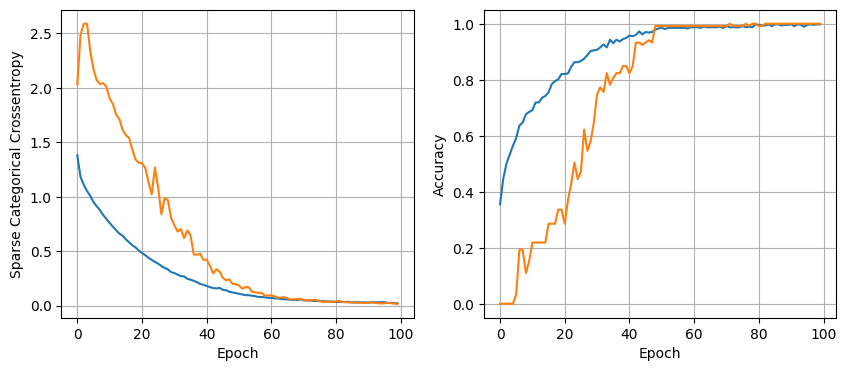

32 nodes, dropout 0, lr 0.005, batch size 32


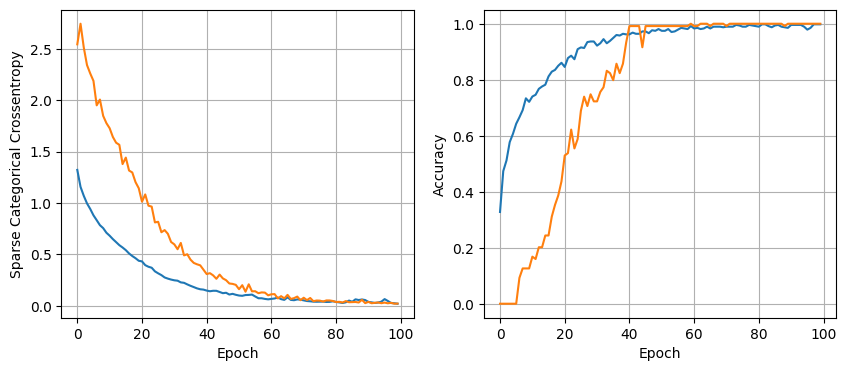

32 nodes, dropout 0, lr 0.005, batch size 64


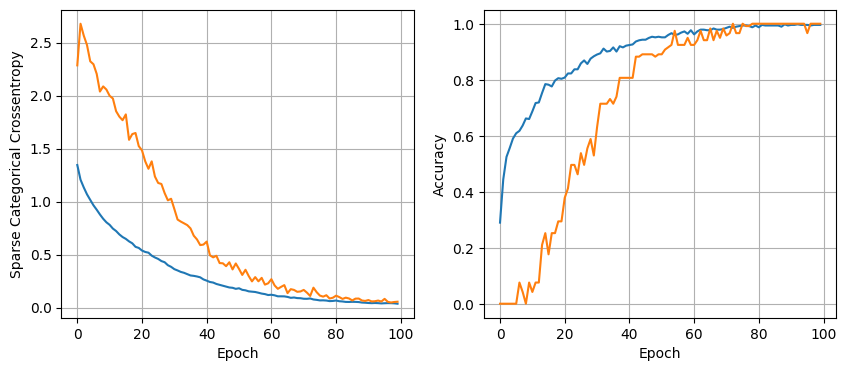

32 nodes, dropout 0, lr 0.005, batch size 128


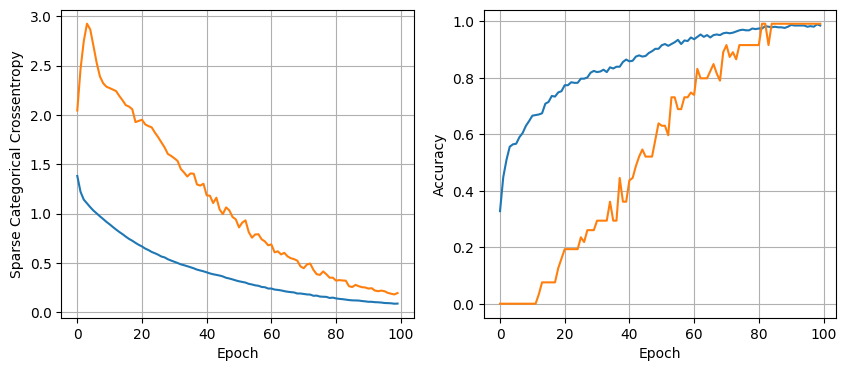

32 nodes, dropout 0, lr 0.001, batch size 32


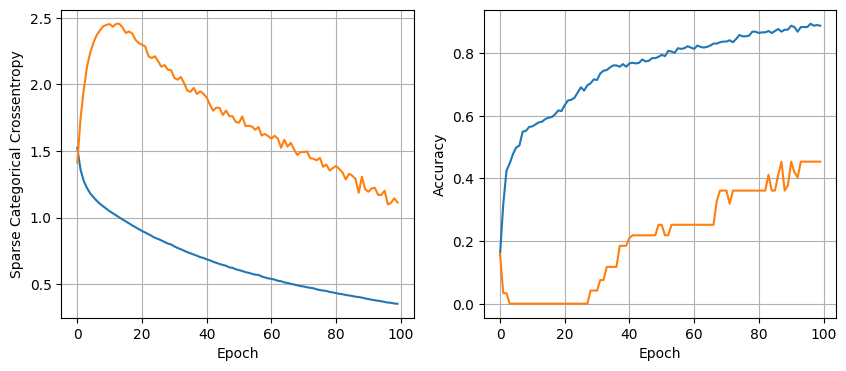

32 nodes, dropout 0, lr 0.001, batch size 64


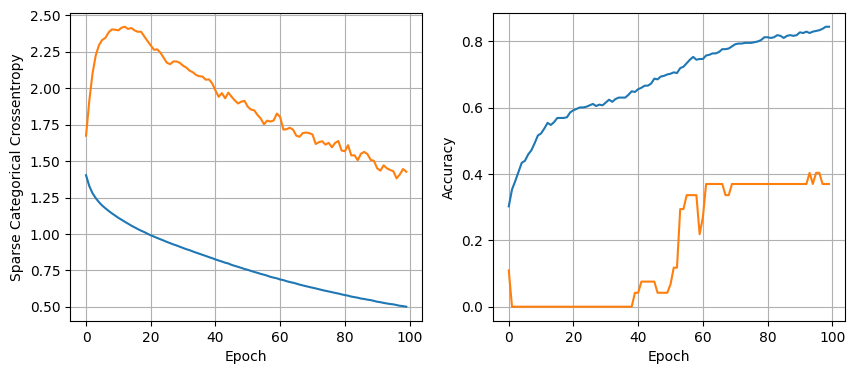

32 nodes, dropout 0, lr 0.001, batch size 128


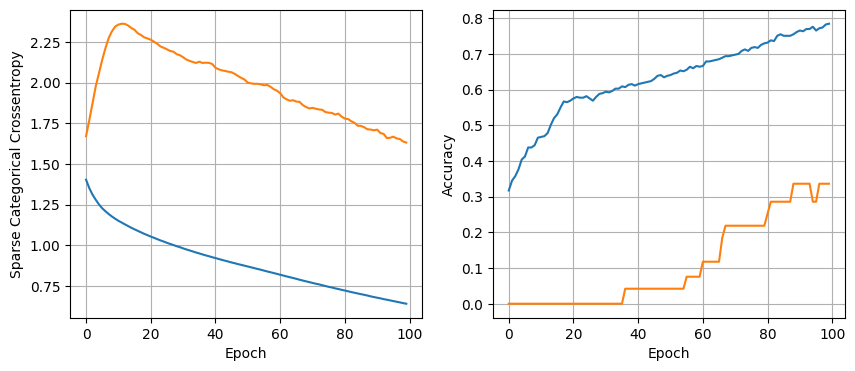

32 nodes, dropout 0.2, lr 0.01, batch size 32


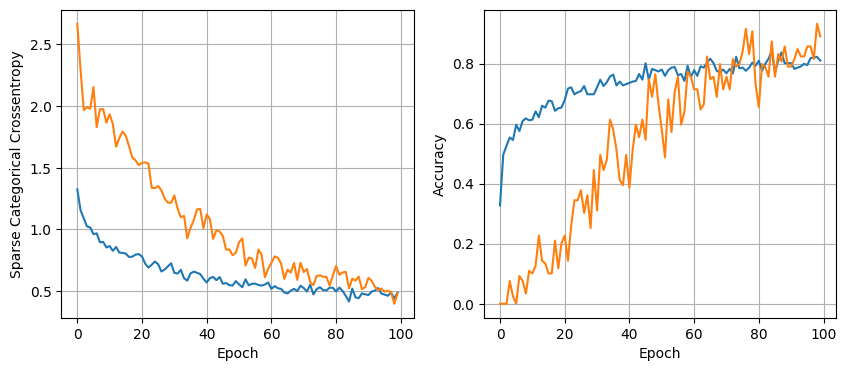

32 nodes, dropout 0.2, lr 0.01, batch size 64


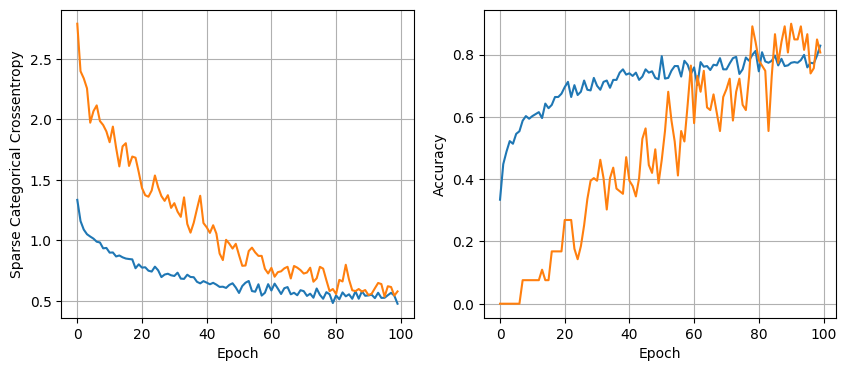

32 nodes, dropout 0.2, lr 0.01, batch size 128


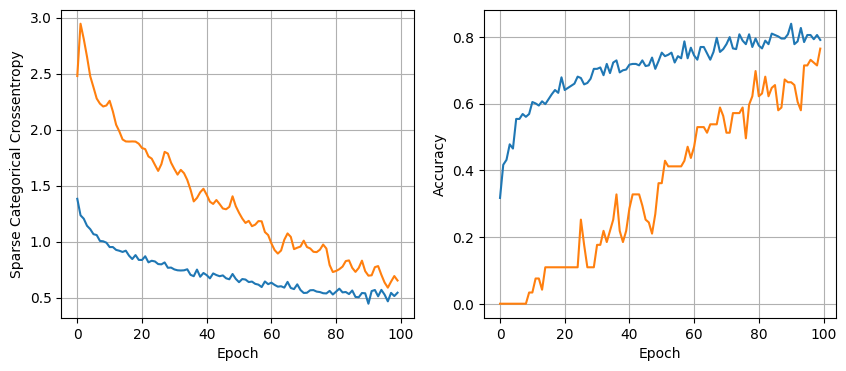

32 nodes, dropout 0.2, lr 0.005, batch size 32


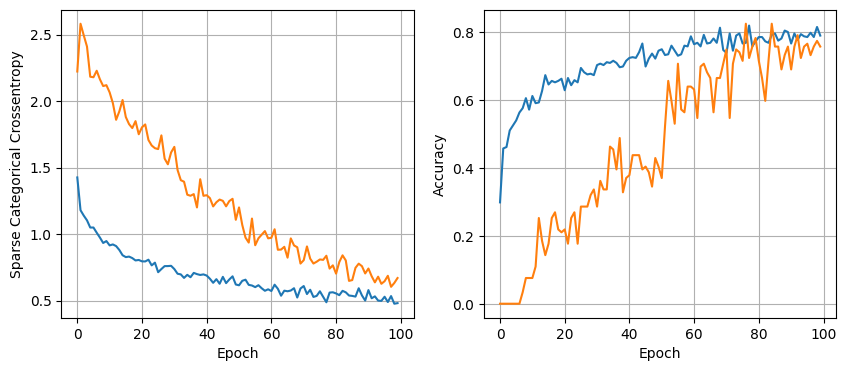

32 nodes, dropout 0.2, lr 0.005, batch size 64


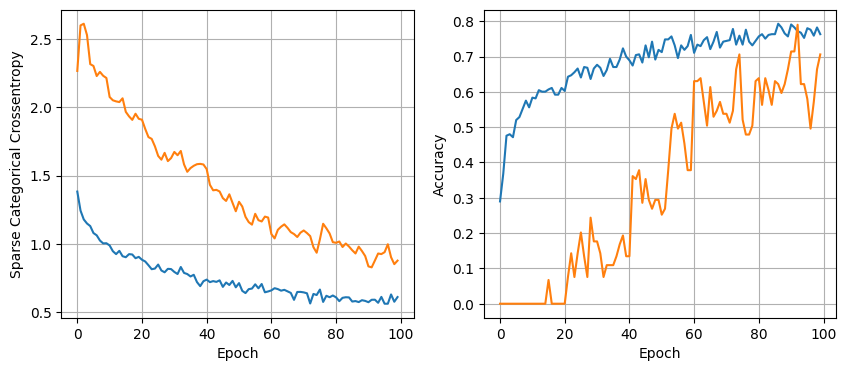

32 nodes, dropout 0.2, lr 0.005, batch size 128


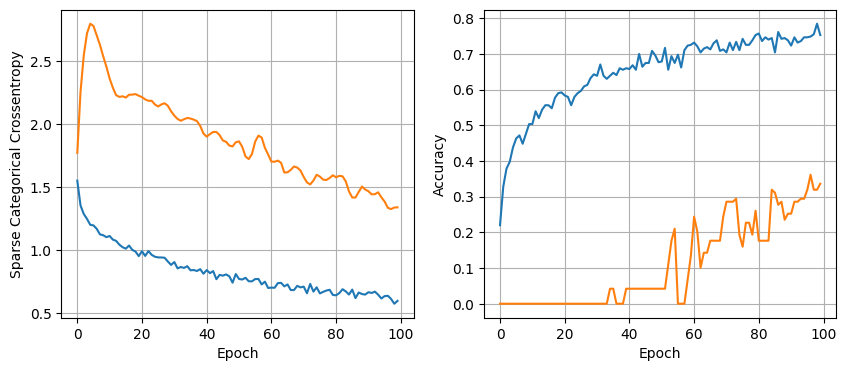

32 nodes, dropout 0.2, lr 0.001, batch size 32


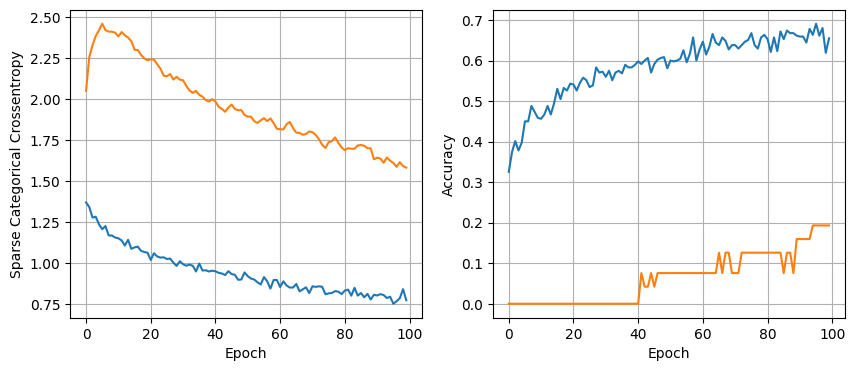

32 nodes, dropout 0.2, lr 0.001, batch size 64


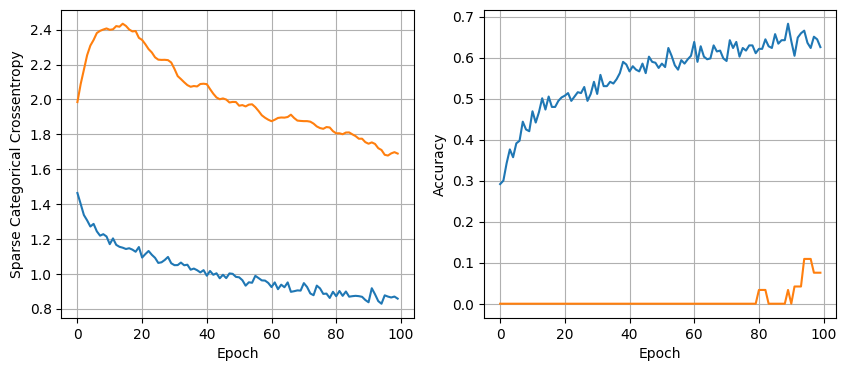

32 nodes, dropout 0.2, lr 0.001, batch size 128


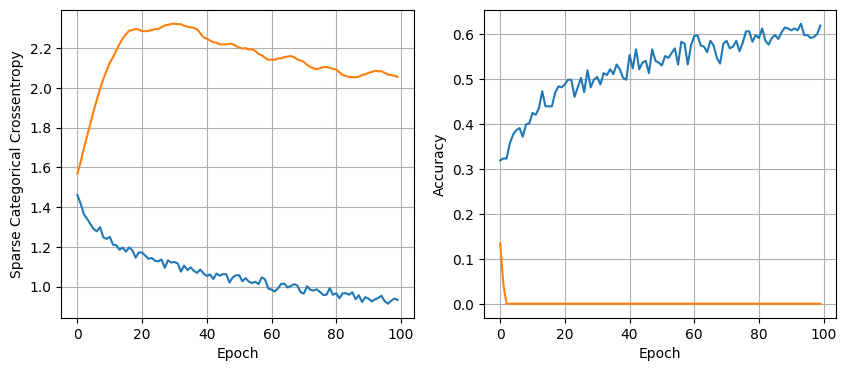

64 nodes, dropout 0, lr 0.01, batch size 32


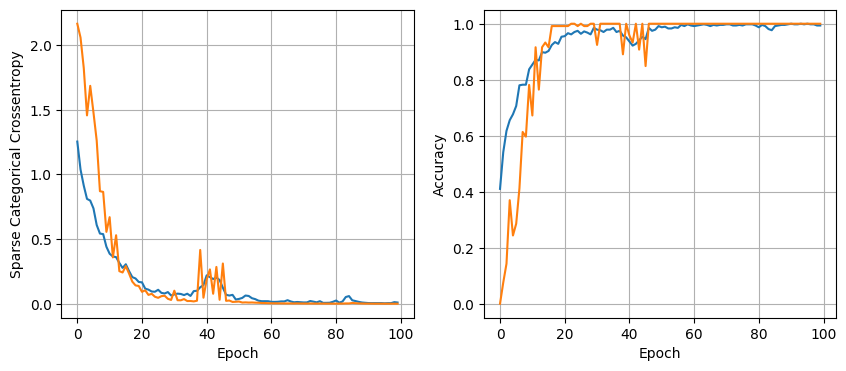

64 nodes, dropout 0, lr 0.01, batch size 64


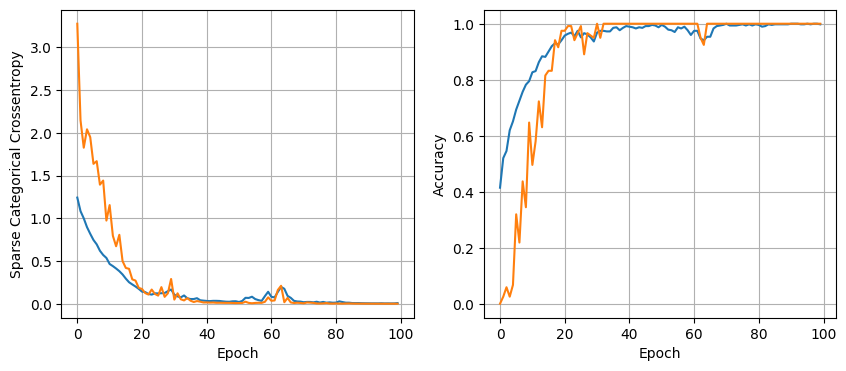

64 nodes, dropout 0, lr 0.01, batch size 128


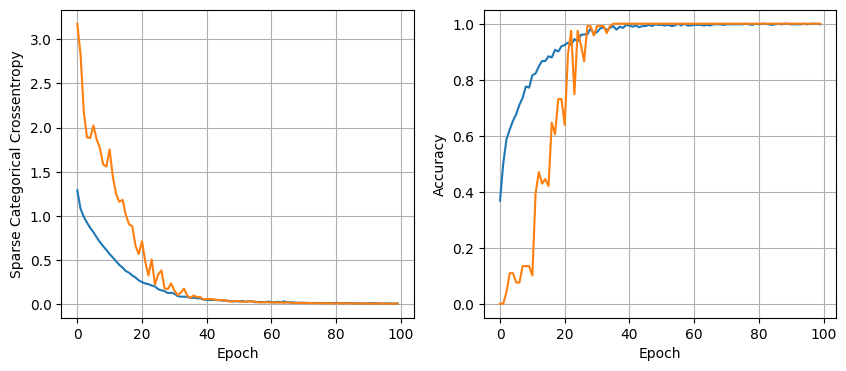

64 nodes, dropout 0, lr 0.005, batch size 32


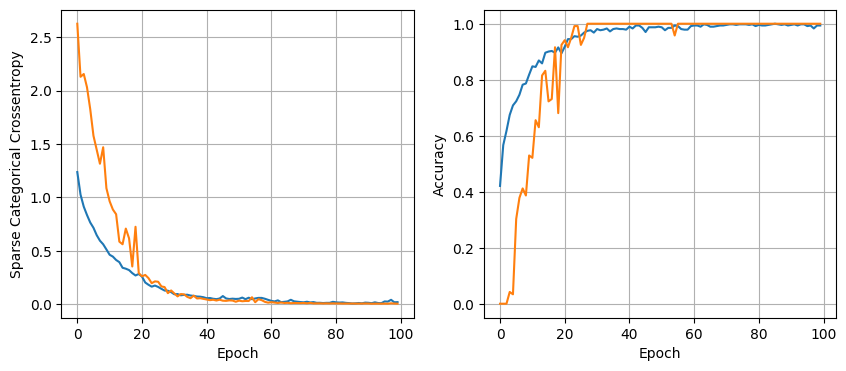

64 nodes, dropout 0, lr 0.005, batch size 64


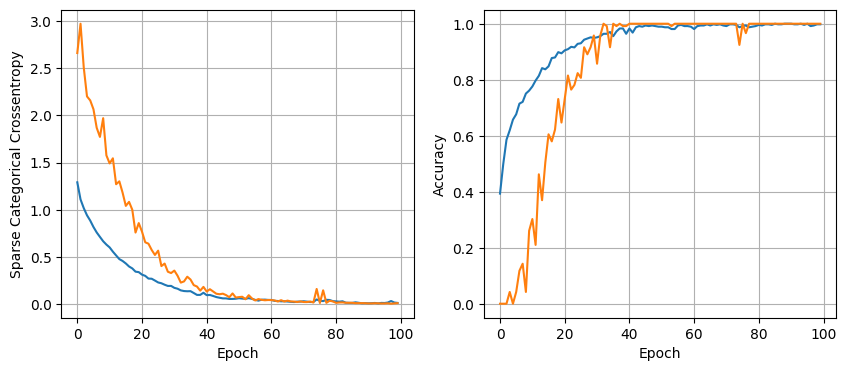

64 nodes, dropout 0, lr 0.005, batch size 128


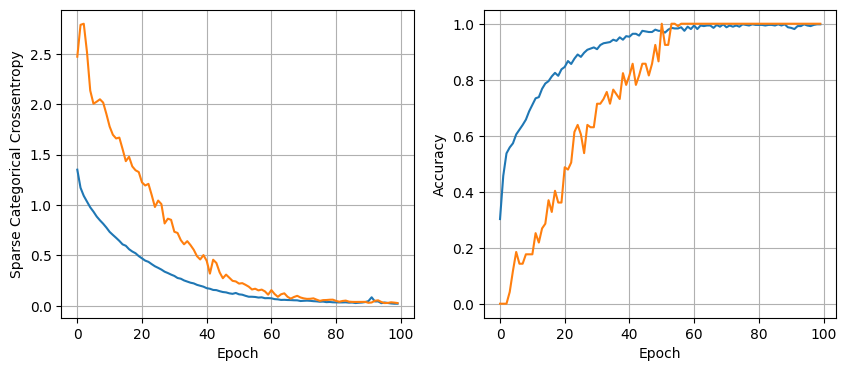

64 nodes, dropout 0, lr 0.001, batch size 32


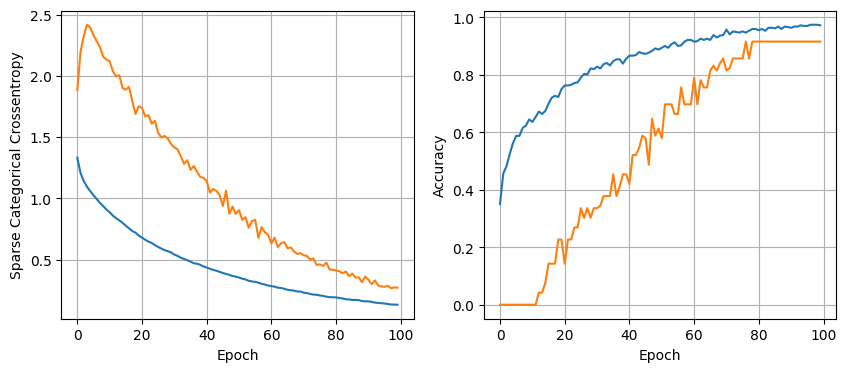

64 nodes, dropout 0, lr 0.001, batch size 64


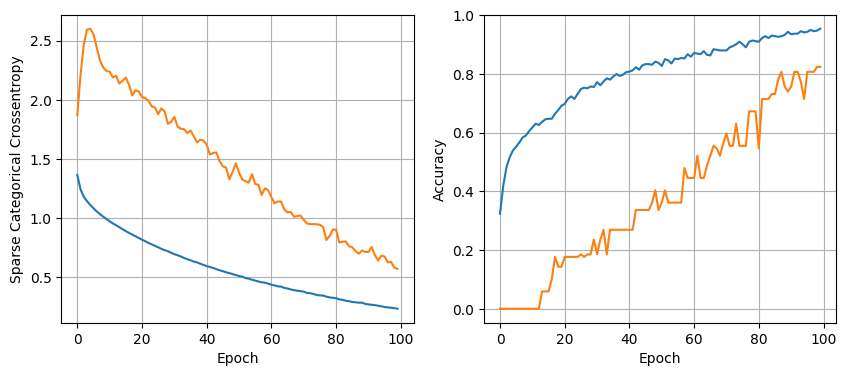

64 nodes, dropout 0, lr 0.001, batch size 128


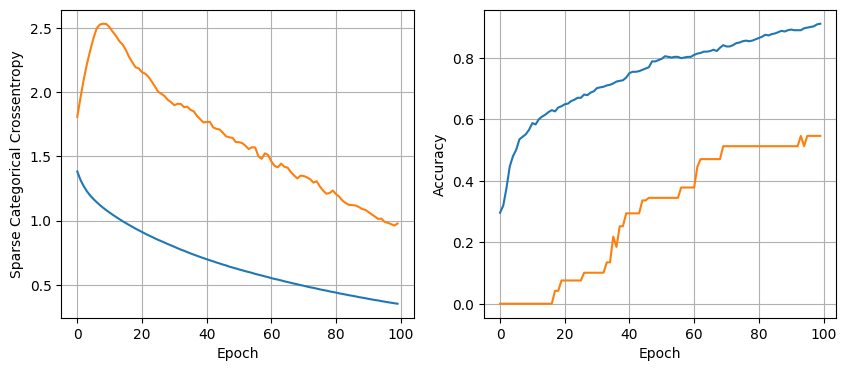

64 nodes, dropout 0.2, lr 0.01, batch size 32


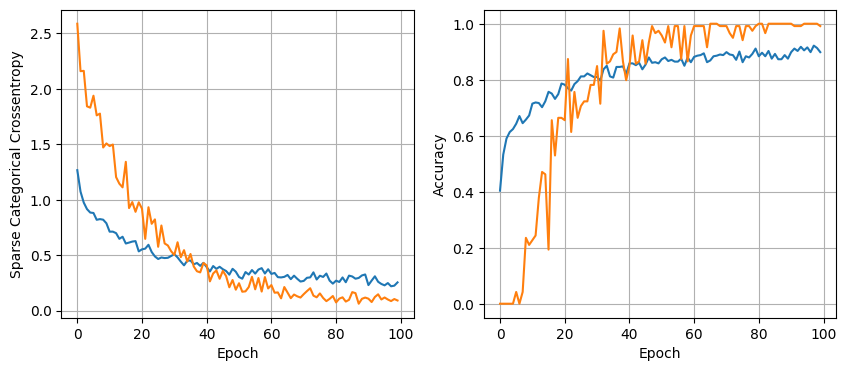

64 nodes, dropout 0.2, lr 0.01, batch size 64


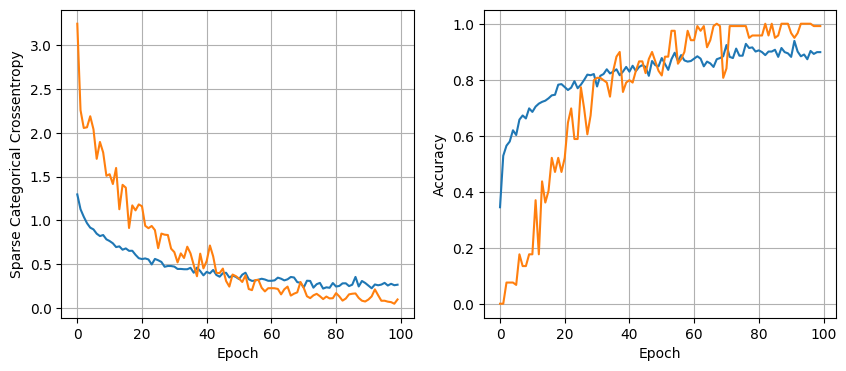

64 nodes, dropout 0.2, lr 0.01, batch size 128


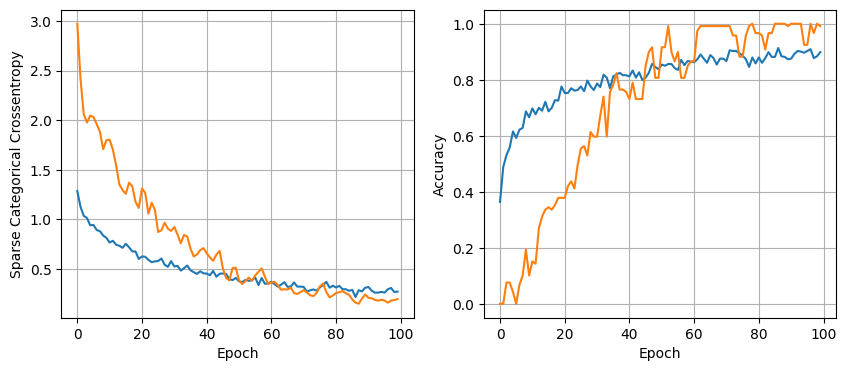

64 nodes, dropout 0.2, lr 0.005, batch size 32


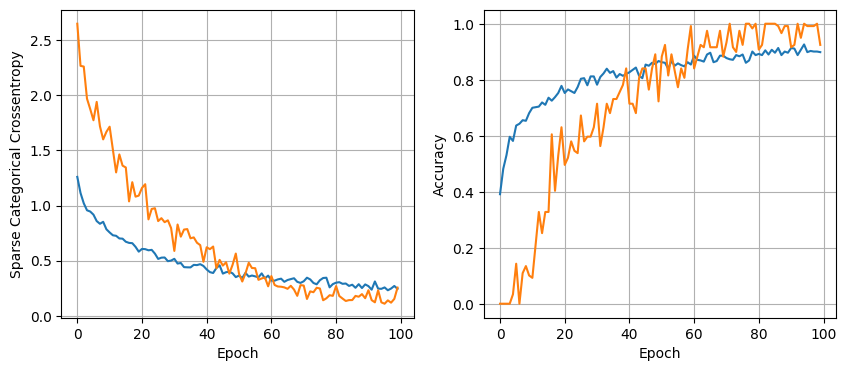

64 nodes, dropout 0.2, lr 0.005, batch size 64


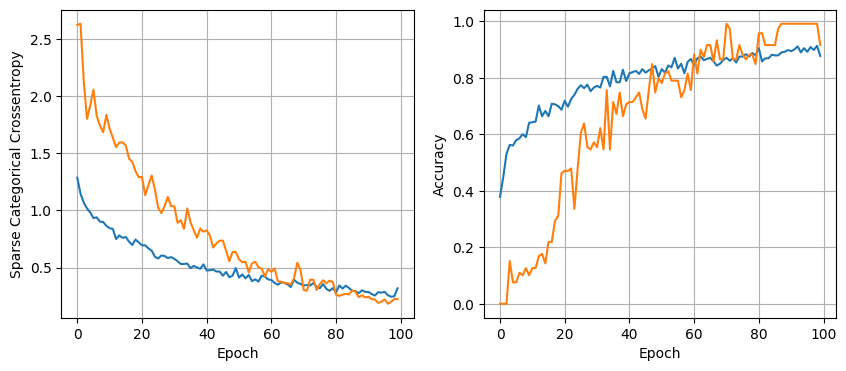

64 nodes, dropout 0.2, lr 0.005, batch size 128


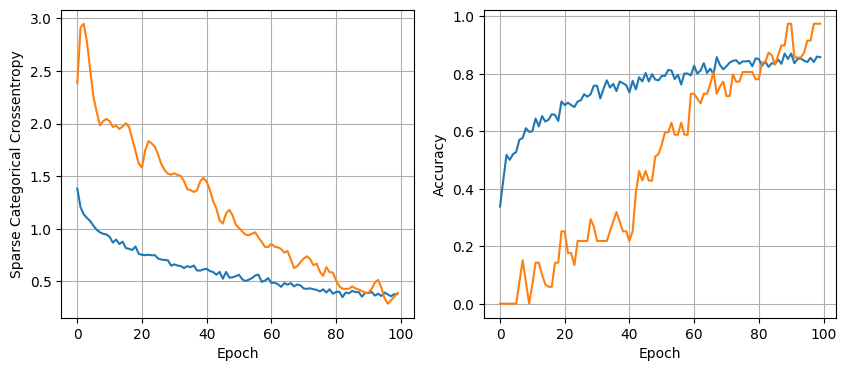

64 nodes, dropout 0.2, lr 0.001, batch size 32


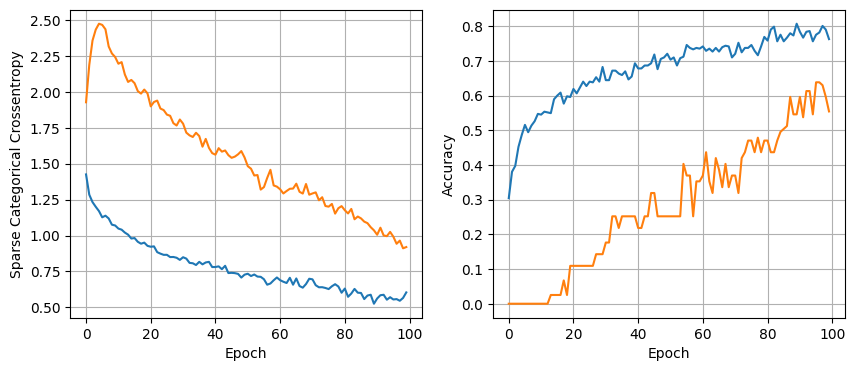

64 nodes, dropout 0.2, lr 0.001, batch size 64


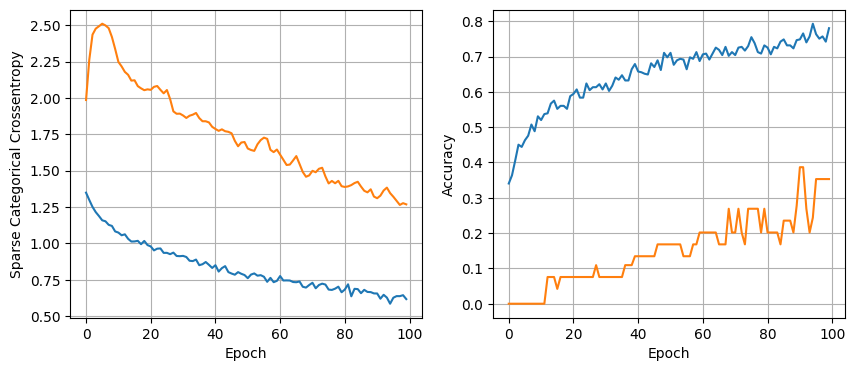

64 nodes, dropout 0.2, lr 0.001, batch size 128


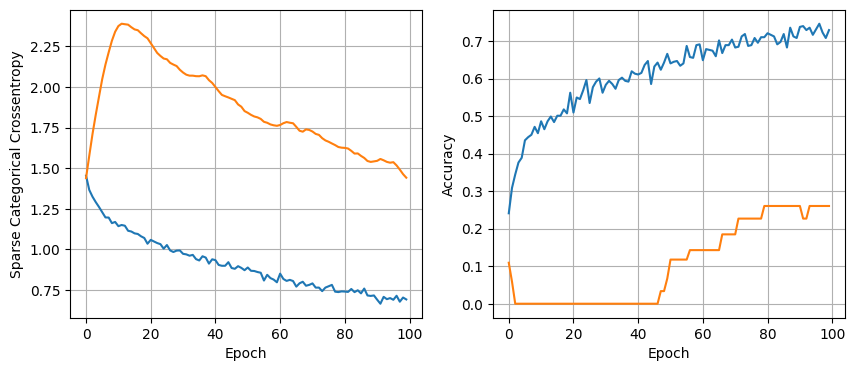

In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100

for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")

                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)

                # Extract loss from evaluation
                val_loss, _ = model.evaluate(X_valid, y_valid, verbose=0)  # Extract only loss

                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model


In [ ]:
#64 nodes, dropout 0, lr 0.005, batch size 64
model, history = train_model(X_train, y_train, 64, 0, 0.005, 64, 100)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [ ]:
if y_test.ndim > 1:
    y_test = y_test.argmax(axis=1)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.51      0.49        43
           1       0.42      0.39      0.41        33
           2       0.56      0.55      0.55        33
           3       0.33      0.30      0.32        10

    accuracy                           0.47       119
   macro avg       0.45      0.44      0.44       119
weighted avg       0.47      0.47      0.47       119



#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
# Number of features to consider at every split
max_features = ['sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}

In [ ]:
cross_validation = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
gs_rfc = RandomizedSearchCV(RandomForestClassifier(),
                                random_grid,
                                cv=cross_validation,
                                verbose=1,
                                n_jobs=-1,
                                scoring='accuracy')

In [ ]:
gs_rfc = gs_rfc.fit(X_train, y_train)

Fitting 30 folds for each of 10 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

In [ ]:
y_pred = gs_rfc.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.40      0.44        43
           1       0.44      0.33      0.38        33
           2       0.35      0.52      0.41        33
           3       0.30      0.30      0.30        10

    accuracy                           0.40       119
   macro avg       0.39      0.39      0.38       119
weighted avg       0.42      0.40      0.40       119

